In [1]:
# load required packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from ixmp import ixPlatform
from tools import Plots, scenario_ds, read_ds

In [2]:
# launch the IX modeling platform using the local default database                                                                                                                       
mp = ixPlatform(dbtype='HSQLDB') # use dbtype='HSQLDB' for a local database

In [3]:
country = 'Israel'
horizon = range(2010, 2050, 10)

plants = [
    "coal_ppl", 
    "gas_ppl", 
    "oil_ppl", 
    "bio_ppl", 
    "hydro_ppl",
    "wind_ppl", 
    "solar_pv_ppl", # actually primary -> final
]

lights = [
    "bulb", 
    "cfl", 
]

name = "Israeli energy model"
base_scen = "baseline"

In [4]:
with read_ds(mp, name, base_scen, close=True) as ds:
    print(ds.idx_names('bound_total_capacity_up'))

['node_loc' 'technology' 'year_act']


In [5]:
new_scen = 'no_coal'

bound = pd.DataFrame({
        'node_loc': country,
        'year_act':[2030, 2040],
        'technology': 'coal_ppl',
        'value': 5,
        'unit': 'GWa',
})

with scenario_ds(mp, country, name, base_scen, new_scen, close=True) as ds:
    ds.add_par('bound_total_capacity_up', bound)

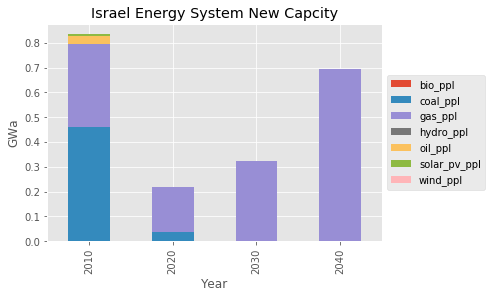

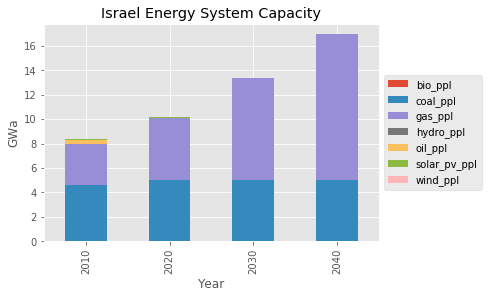

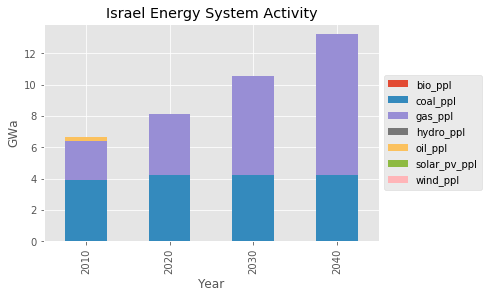

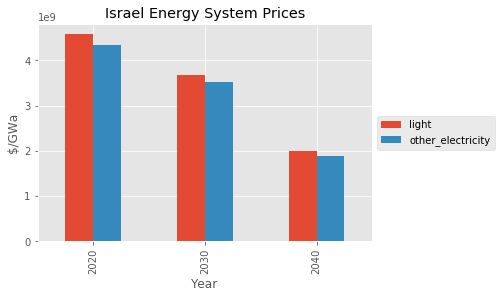

In [6]:
with read_ds(mp, name, new_scen, close=True) as ds:
    p = Plots(ds, country)
    p.plot_new_capacity(baseyear=True, subset=plants)
    p.plot_capacity(baseyear=True, subset=plants)
    p.plot_activity(baseyear=True, subset=plants)
    p.plot_prices(baseyear=False, subset=['light', 'other_electricity'])